# Data, Libraries & Settings

#### Libraries

In [1]:
# Data manipulation libs
import pandas as pd
import numpy as np
import random
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization, Dropout

# PA 2 Project
# from sklearn.linear_model import LogisticRegression # MNLogit
# from xgboost import XGBClassifier # GBM
# from sklearn.model_selection import GridSearchCV # GridSearch
# import seaborn as sns
# import matplotlib.pyplot as plt
# from ale_utils import first_order_aleplot_quant, second_order_aleplot_quant

#### Settings

In [2]:
# Plot settings
line_width = 0.75

# Print all columns from pandas df
pd.set_option('display.max_columns', None)

# Print all columns from pandas df
# pd.set_option('display.max_rows', None)

# MP inline
%matplotlib inline

#### Subject Data

In [3]:
# Get subjects info
# Desktop
# subjects_information_df = pd.read_csv('C:/Users/nuke2/Desktop/NW Work/Data/CDL Usecases/data_subjects_info.csv')
# Laptop
subjects_information_df = pd.read_csv('C:/Users/Sam/Desktop/NW Work/DATA/CDL/data_subjects_info.csv')


'''
Column  Attribute         [Unit]
Code:   subject ID        [1 to 24]
Weight: Weight of subject [Kg.]
Height: Weight of subject [Cm.]
Age:    Age of subject    [Years]
Gender: Gender of subject [0: F, 1: M]
'''
subjects_information_df.head(3)

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0


#### Test Data Description

The test data was collected during these 6 trials:
- Downstairs $\;$[dws]
- Upstairs   $\;$[ups]
- Walking    $\;$[wlk]
- Jogging    $\;$[jog]
- Sitting    $\;$[sit]
- Standing   $\;$[std]

# Data Loading

#### Define parameters for data importing

In [4]:
'''
Dictionary to specify file numbers of trials so all data can be loaded
'''
trial_id_dict = {
    'dws': [1, 2, 11],
    'ups': [3, 4, 12],
    'wlk': [7, 8, 15],
    'jog': [9, 16],
    'sit': [5, 13],
    'std': [6, 14]
}

'''
Get dictionary for all gyroscopic measurements
'''
measurement_dict = {
    'attitude': ['attitude.roll', 'attitude.pitch', 'attitude.yaw'],
    'gravity':  ['gravity.x', 'gravity.y', 'gravity.z'],
    'rotationRate': ['rotationRate.x', 'rotationRate.y', 'rotationRate.z'],
    'userAcceleration': ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']
}

'''
Specify number of subjects and list of subject numbers
*Assumes the subject ID's go from 1 to n incremented by 1*
'''
subject_number = 24
subject_id_lst = list(range(1, subject_number+1))

'''
Get folder location with cleaned test data
'''
# Desktop
# test_data = 'C:/Users/nuke2/Desktop/NW Work/Data/CDL Usecases/df_all_data.csv'
# Laptop
test_data = 'C:/Users/Sam/Desktop/NW Work/DATA/CDL/df_all_data.csv'

#### Import Data

In [5]:
# Load cleaning data
df_all_data = pd.read_csv(test_data)
df_all_data.head()

,tick_num,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,test_type,subject_id,test_trial_number,time_since_start,time_series_data,attitude,gravity,rotationRate,userAcceleration,weight,height,age,gender
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws,1,1,0.00,2022-01-01 00:00:00.000,1.832682,1.0,1.370498,0.513360,102,188,46,1
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws,1,1,0.02,2022-01-01 00:00:00.020,1.818843,1.0,1.141648,0.250235,102,188,46,1
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws,1,1,0.04,2022-01-01 00:00:00.040,1.812205,1.0,0.372530,0.215450,102,188,46,1
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws,1,1,0.06,2022-01-01 00:00:00.060,1.803822,1.0,1.049628,0.166728,102,188,46,1
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws,1,1,0.08,2022-01-01 00:00:00.080,1.783334,1.0,0.921229,0.408720,102,188,46,1


# Modeling data prep

#### Feature engineering

In [6]:
# Uhh

#### Test train validate split

In [7]:
# Specify number of tests
num_tests = 16

# Specify train numbers
train_trial_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Specify test/validation numbers
test_and_validation_numbers = [11, 12, 13, 14, 15, 16]

# Define dataframes for test train validation sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_validation = pd.DataFrame()

# Specify test and validation subjects
test_subset = random.sample(subject_id_lst, subject_number//2)
val_subset = [n for n in subject_id_lst if n not in test_subset]

# Create test train validation dataframes
for trial_number in range(1, num_tests + 1):
    # Fill in df_train if trial_number in train_trial_numbers
    if trial_number in train_trial_numbers:
        data_temp = df_all_data[df_all_data.test_trial_number == trial_number]
        df_train = pd.concat([df_train, data_temp])
    # Fill in df_test / df_validation if trial_number in test_and_validation_numbers
    elif trial_number in test_and_validation_numbers:
        data_temp = df_all_data[df_all_data.test_trial_number == trial_number]
        df_test = pd.concat([df_test, data_temp[data_temp.subject_id.isin(test_subset)]])
        df_validation = pd.concat([df_validation, data_temp[data_temp.subject_id.isin(val_subset)]])

#### Normalize

In [8]:
# Define the columns to be normalized
normalize_columns = [
    'attitude.roll', 'attitude.pitch', 'attitude.yaw',
    'gravity.x', 'gravity.y', 'gravity.z',
    'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
    'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
    'attitude', 'gravity', 'rotationRate', 'userAcceleration',
    'weight', 'height', 'age'
]

# Initialize a scaler with range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler to the training data
scaler.fit(df_train[normalize_columns])

# Transform the training, testing and validation data
df_train[normalize_columns] = scaler.transform(df_train[normalize_columns])
df_test[normalize_columns] = scaler.transform(df_test[normalize_columns])
df_validation[normalize_columns] = scaler.transform(df_validation[normalize_columns])

## LSTM

#### LSTM settings

In [9]:
# Set length of memory (# of observation model looks back)
n_timesteps = 50

# Set number of categories model is predicting
n_categories = 6

#### Select LSTM columns / data

In [10]:
# Column Selection for LSTM input
lstm_columns = [    
    'attitude.roll', # Roll attitude of device    
    'attitude.pitch', # Pitch attitude of device    
    'attitude.yaw', # Yaw attitude of device    
    'gravity.x', # x-axis measurement of gravity    
    'gravity.y', # y-axis measurement of gravity    
    'gravity.z', # z-axis measurement of gravity    
    'rotationRate.x', # x-axis measurement of rotation rate    
    'rotationRate.y', # y-axis measurement of rotation rate    
    'rotationRate.z', # z-axis measurement of rotation rate    
    'userAcceleration.x', # x-axis measurement of user acceleration    
    'userAcceleration.y', # y-axis measurement of user acceleration    
    'userAcceleration.z', # z-axis measurement of user acceleration     
#     'attitude', # Total attitude
#     'gravity', # Total gravity
#     'rotationRate', # Total rotationRate
#     'userAcceleration', # Total userAcceleration   
#     'weight', # Weight of subject
#     'height', # Height of subject
#     'age', # Age of subject
#     'gender' # Gender of subject
]

# Get train test validation split
df_train_lstm = df_train[lstm_columns]
df_val_lstm = df_validation[lstm_columns]
df_test_lstm = df_test[lstm_columns]

In [11]:
df_test_lstm

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
9888,0.459507,-0.702698,0.095471,0.447217,0.892570,-0.048320,0.249926,0.036959,-0.020892,-0.028820,-0.280839,-0.048583
9889,0.461319,-0.709938,0.097832,0.437447,0.897632,-0.044504,0.263017,0.012953,-0.008058,-0.013360,-0.293644,-0.068143
9890,0.454075,-0.711522,0.091516,0.433909,0.898724,-0.054216,0.329229,0.014643,0.026621,-0.010601,-0.328386,-0.056557
9891,0.440016,-0.708622,0.073565,0.434713,0.896720,-0.074267,0.376533,0.062798,0.030985,-0.021850,-0.333602,-0.021982
9892,0.432879,-0.705714,0.053543,0.436739,0.894692,-0.084948,0.375606,0.152525,0.024190,-0.005054,-0.300550,-0.032206
...,...,...,...,...,...,...,...,...,...,...,...,...
767655,-0.494539,-0.769026,-0.641665,-0.355868,0.934563,0.003271,0.191266,0.061891,0.009207,-0.035413,-0.185477,0.154756
767656,-0.488266,-0.792269,-0.639975,-0.321406,0.946908,-0.002529,0.345137,0.052048,0.331198,0.097539,-0.367692,-0.198507
767657,-0.414307,-0.868252,-0.567667,-0.199324,0.978413,-0.046053,0.432506,0.053172,0.672828,0.110992,-0.238396,-0.173809
767658,-0.167084,-0.947328,-0.303332,-0.042216,0.996462,-0.063993,0.323068,-0.235016,0.710004,0.079967,-0.081074,-0.198356


#### Wrangle data to be run in LSTM

In [12]:
# Convert DataFrames to arrays
array_train_lstm = df_train_lstm.values
array_val_lstm = df_val_lstm.values
array_test_lstm = df_test_lstm.values

# Create arrays to store values for each test and validation trial
array_test_lstm_trails = {}
X_test_lstm_trials = {}
array_val_lstm_trails = {}
X_val_lstm_trials = {}

for key in trial_id_dict:
    # Extract the values for each test trial
    array_test_lstm_trails[key] = df_test[df_test.test_type == key][lstm_columns].values
    X_test_lstm_trials[key] = array_test_lstm_trails[key]
    # Extract the values for each validation trial
    array_val_lstm_trails[key] = df_validation[df_validation.test_type == key][lstm_columns].values
    X_val_lstm_trials[key] = array_val_lstm_trails[key]    

# Store the number of features and the number of time steps
n_features = len(lstm_columns)
n_timesteps = n_timesteps

# Initialize arrays to store the LSTM inputs for train, validation, and test sets
X_train_lstm = np.zeros((array_train_lstm.shape[0], n_timesteps, n_features))
X_val_lstm = np.zeros((array_val_lstm.shape[0], n_timesteps, n_features))
X_test_lstm = np.zeros((array_test_lstm.shape[0], n_timesteps, n_features))
for key in trial_id_dict:
    X_test_lstm_trials[key] = np.zeros((X_test_lstm_trials[key].shape[0], n_timesteps, n_features))
    X_val_lstm_trials[key] = np.zeros((X_val_lstm_trials[key].shape[0], n_timesteps, n_features))

# Loop through the arrays for each set and create the LSTM input
for arr in [X_train_lstm, X_val_lstm, X_test_lstm]:
    if np.array_equal(arr, X_train_lstm):
        for i in range(n_timesteps, array_train_lstm.shape[0]):
            X_train_lstm[i-n_timesteps] = array_train_lstm[i-n_timesteps:i]
    elif np.array_equal(arr, X_val_lstm):
        for i in range(n_timesteps, array_val_lstm.shape[0]):
            X_val_lstm[i-n_timesteps] = array_val_lstm[i-n_timesteps:i]
    elif np.array_equal(arr, X_test_lstm):
        for i in range(n_timesteps, array_test_lstm.shape[0]):
            X_test_lstm[i-n_timesteps] = array_test_lstm[i-n_timesteps:i]

# Loop through the arrays for each test trial and create the LSTM input
for key in trial_id_dict:
    for i in range(n_timesteps, X_test_lstm_trials[key].shape[0]):
            X_test_lstm_trials[key][i-n_timesteps] = array_test_lstm_trails[key][i-n_timesteps:i]
    for i in range(n_timesteps, X_val_lstm_trials[key].shape[0]):
            X_val_lstm_trials[key][i-n_timesteps] = array_val_lstm_trails[key][i-n_timesteps:i]

# Initilize encoder and set categories
encoder = LabelEncoder()
n_categories = n_categories

# Encode the training y data and convert to categorical using one-hot encoding
encoder.fit(df_train['test_type'])
y_train_lstm = encoder.transform(df_train['test_type'])
y_train_lstm = to_categorical(y_train_lstm, num_classes = n_categories)

# Encode the validation y data and convert to categorical using one-hot encoding
y_val_lstm = encoder.transform(df_validation['test_type'])
y_val_lstm = to_categorical(y_val_lstm, num_classes = n_categories)

# Encode the test y data and convert to categorical using one-hot encoding
y_test_lstm = encoder.transform(df_test['test_type'])
y_test_lstm = to_categorical(y_test_lstm, num_classes = n_categories)

# Encode the test y data for each trial and convert to categorical using one-hot encoding
y_test_lstm_trials = {}
for key in trial_id_dict:
    y_test_lstm_trials[key] = encoder.transform(df_test[df_test.test_type == key]['test_type'])
    y_test_lstm_trials[key] = to_categorical(y_test_lstm_trials[key], num_classes = n_categories)
    
# Encode the validation y data for each trial and convert to categorical using one-hot encoding
y_val_lstm_trials = {}
for key in trial_id_dict:
    y_val_lstm_trials[key] = encoder.transform(df_validation[df_validation.test_type == key]['test_type'])
    y_val_lstm_trials[key] = to_categorical(y_val_lstm_trials[key], num_classes = n_categories)

#### Create LSTM model

In [14]:
# Initialize a sequential model
model = Sequential()

# Add a bidirectional LSTM layer to the model
model.add(Bidirectional(LSTM(units=32, input_shape=(n_timesteps, n_features))))

# Uncomment to add a dropout layer
# model.add(Dropout(0.5))

# Add a dense output layer with 6 units and a softmax activation function
model.add(Dense(n_categories, activation='softmax'))

# Compile the model using the Adam optimizer, categorical crossentropy loss, and accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Check if GPU available

In [15]:
# Enable GPU if available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("No GPU found")

No GPU found


#### Fit model

In [26]:
# Train the model for 5 epochs using mini-batches of size 64
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64)

model.summary()

Epoch 1/5
16898/16898 [==============================] - 127s 7ms/step - loss: 0.1194 - accuracy: 0.9663
Epoch 2/5
16898/16898 [==============================] - 138s 8ms/step - loss: 0.0622 - accuracy: 0.9810
Epoch 3/5
16898/16898 [==============================] - 139s 8ms/step - loss: 0.0421 - accuracy: 0.9867
Epoch 4/5
16898/16898 [==============================] - 163s 10ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 5/5
16898/16898 [==============================] - 192s 11ms/step - loss: 0.0234 - accuracy: 0.9925


#### Save model

In [13]:
# Desktop
# model_path = "C:/Users/nuke2/Desktop/NW Work/CDL usecases/MotionSense/"
# Laptop
model_path = "C:/Users/Sam/Desktop/NW Work/CDL-UseCases/MotionSense/"

# model.save(model_path + "LSTM_model_weights")

#### Load model


In [14]:
loaded_model = tf.keras.models.load_model(model_path + "LSTM_model_weights")

# Check its architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               11520     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 11,910
Trainable params: 11,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Convert model to .h5 format

loaded_model.save('LSTM_model_weights')

#### Get predictions

In [24]:
# Predict on test data using the trained model
y_pred_test = model.predict(X_test_lstm)

# Test trial accuracy
trial_acc_test = {}
for key in trial_id_dict:
    temp_ground = np.argmax(y_test_lstm_trials[key], axis=1)
    temp_predictions = np.argmax(model.predict(X_test_lstm_trials[key]), axis=1)
    trial_acc_test[key] = np.mean(temp_ground == temp_predictions)

# Predict on validation data using the trained model
y_pred_val = model.predict(X_val_lstm)

# Validation trial accuracy
trial_acc_val = {}
for key in trial_id_dict:
    temp_ground = np.argmax(y_val_lstm_trials[key], axis=1)
    temp_predictions = np.argmax(model.predict(X_val_lstm_trials[key]), axis=1)
    trial_acc_val[key] = np.mean(temp_ground == temp_predictions)

1235/1235 [==============================] - 6s 5ms/step


#### Print predictions

In [ ]:
'''
Get total test and validation accuracies
Get trial test and validation accuracies
'''

# Convert one-hot encoded outputs back to class indices
y_ground_test = np.argmax(y_test_lstm, axis=1)
y_ground_val = np.argmax(y_val_lstm, axis=1)

# Obtain class predictions from model output
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_val_classes = np.argmax(y_pred_val, axis=1)

# Calculate accuracy by comparing ground truth and predicted classes
accuracy_test = np.mean(y_ground_test == y_pred_test_classes)
accuracy_val = np.mean(y_ground_val == y_pred_val_classes)

# Print LSTM results
print(f"[INFO] -- Total Accuracy")
print(f"Test: {round(accuracy_test * 100, 3)}%")
print(f"Validation (Test #2): {round(accuracy_val * 100, 3)}%")
print(f"")
print(f"[INFO] -- Test Trials Accuracy")
for key in trial_acc_test:
    print(f"{key}: {round(trial_acc_test[key] * 100, 3)}%")
print("")
print(f"[INFO] -- Validation Trials Accuracy:")
for key in trial_acc_test:
    print(f"{key}: {round(trial_acc_val[key] * 100, 3)}%")

In [ ]:
# Ha!

# Predictive Analytics 2 (Extra Models)

#### Adjust data for models

In [9]:
extra_model_columns = [    
    'attitude.roll', # Roll attitude of device    
    'attitude.pitch', # Pitch attitude of device    
    'attitude.yaw', # Yaw attitude of device    
    'gravity.x', # x-axis measurement of gravity    
    'gravity.y', # y-axis measurement of gravity    
    'gravity.z', # z-axis measurement of gravity    
    'rotationRate.x', # x-axis measurement of rotation rate    
    'rotationRate.y', # y-axis measurement of rotation rate    
    'rotationRate.z', # z-axis measurement of rotation rate    
    'userAcceleration.x', # x-axis measurement of user acceleration    
    'userAcceleration.y', # y-axis measurement of user acceleration    
    'userAcceleration.z', # z-axis measurement of user acceleration     
#     'attitude', # Total attitude
#     'gravity', # Total gravity
#     'rotationRate', # Total rotationRate
#     'userAcceleration', # Total userAcceleration   
#     'weight', # Weight of subject
#     'height', # Height of subject
#     'age', # Age of subject
#     'gender' # Gender of subject
]

#### Get lag features

In [10]:
def add_lagged_features(df, n_lags=5):
    """
    Adds n_lags number of lagged features to each column of a DataFrame.
    """
    # Create a list to store the lagged DataFrames
    lagged_dfs = []

    # Loop over each column in the DataFrame
    for col in df.columns:

        # Create n lagged versions of the column and concatenate them horizontally
        lagged_cols = [df[col].shift(i).fillna(method='bfill') for i in range(1, n_lags+1)]
        lagged_df = pd.concat(lagged_cols, axis=1)

        # Rename the columns with the lag number
        lagged_df.columns = [f"{col}_lag{i}" for i in range(1, n_lags+1)]

        # Store the lagged DataFrame in the list
        lagged_dfs.append(lagged_df)

    # Concatenate all the lagged DataFrames vertically
    lagged_df = pd.concat(lagged_dfs, axis=1)

    # Combine the original DataFrame with the lagged DataFrame
    return pd.concat([df, lagged_df], axis=1)

## Logistic Regression

#### Fit model

In [11]:
# Get logistic regression X and y dataframes
X_train_logistic = df_train[extra_model_columns]
X_val_logistic = df_validation[extra_model_columns]
X_test_logistic = df_test[extra_model_columns]

y_train_logistic = df_train['test_type']
y_val_logistic = df_validation['test_type']
y_test_logistic = df_test['test_type']

n_lag = 50
X_val_logistic = add_lagged_features(X_val_logistic, n_lag)
X_test_logistic = add_lagged_features(X_test_logistic, n_lag)

In [13]:
# Define the parameter grid to search over
params_logistic = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10] 
}

# Define the logistic regression model
model_logistic = LogisticRegression()

# Create the GridSearchCV object
grid_search_logistic = GridSearchCV(model_logistic, params_logistic, cv=3)

# Fit the GridSearchCV object to the data
grid_search_logistic.fit(X_val_logistic, y_val_logistic)

# Print info
print(f"[INFO] -- Best Logistic Found")

C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[INFO] -- Best Logistic Found


C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search_logistic.best_params_)
print("Best score: ", grid_search_logistic.best_score_)

# print the accuracy score of the model
best_model_logistic = grid_search_logistic.best_estimator_
print('Test Accuracy:', best_model_logistic.score(X_test_logistic, y_test_logistic))

Best hyperparameters:  {'C': 1}
Best score:  0.5929403314168177
Test Accuracy: 0.7243047378579492


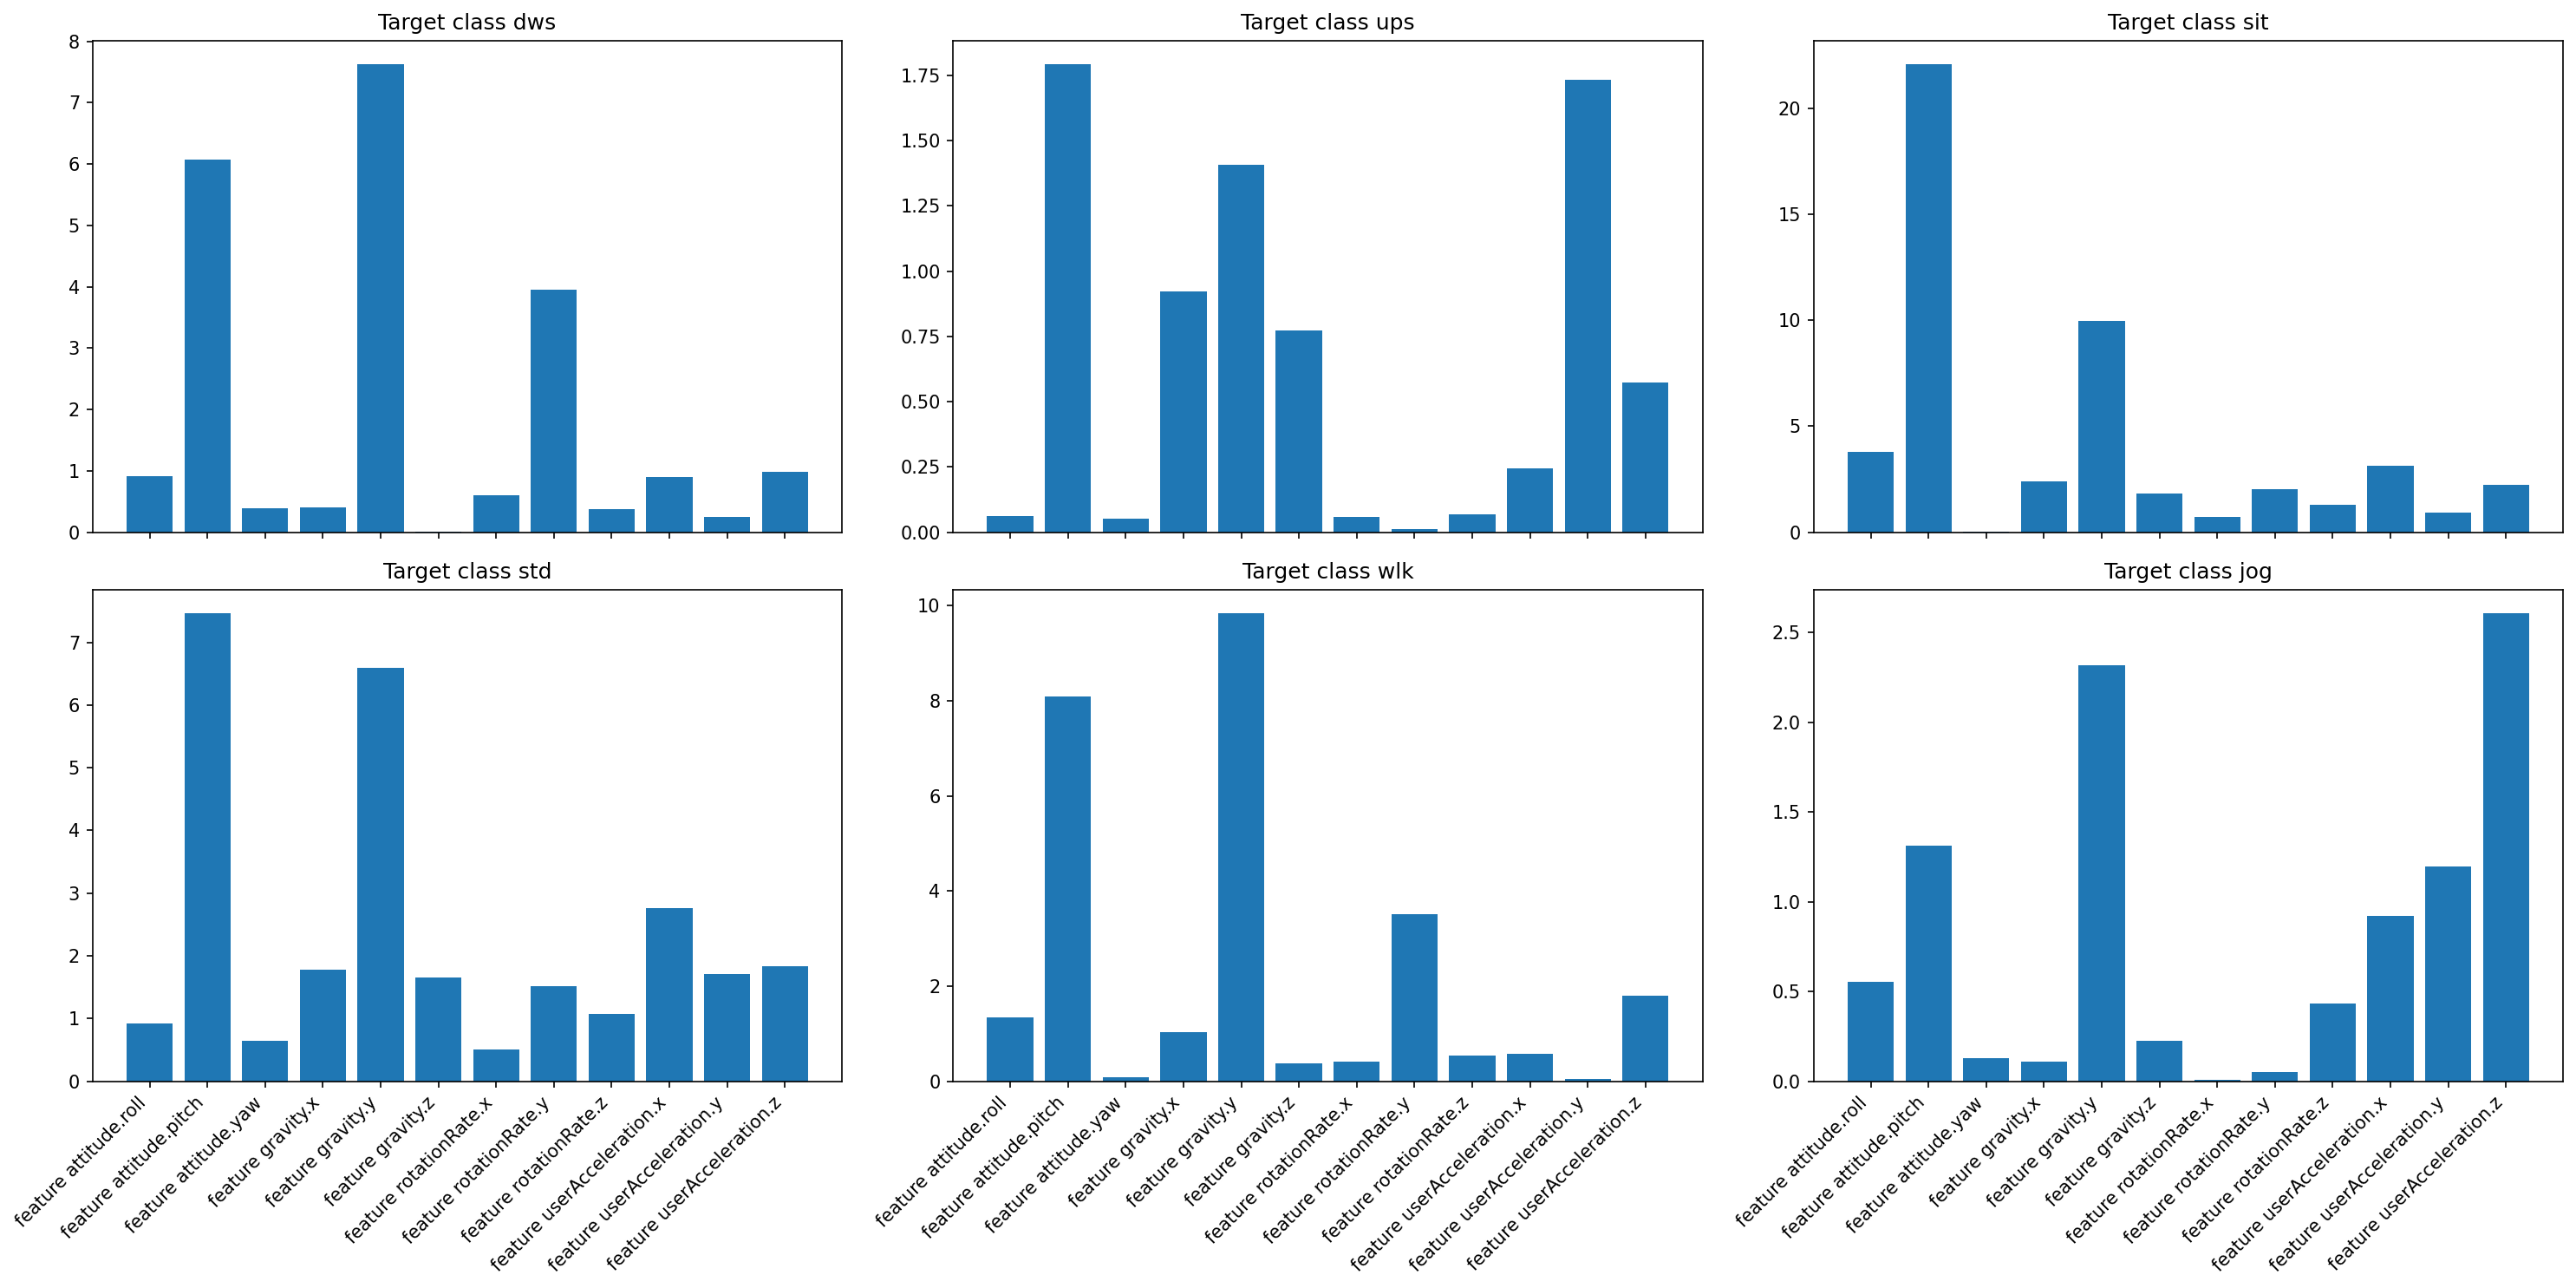

In [117]:
# Get the feature coefficients
coefficients = best_model_logistic.coef_

n_features = coefficients.shape[1]
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

for i, target_class in enumerate(list(y_train_logistic.unique())):
    # Select coefficients for the current target class
    target_idx = np.where(y_train_logistic.unique() == target_class)[0][0]
    coefs = coefficients[target_idx, :]

    # Compute the row and column index for the current target class
    row_idx = i // 3
    col_idx = i % 3

    # Plot coefficients magnitudes
    axs[row_idx, col_idx].bar(range(n_features), np.abs(coefs))
    axs[row_idx, col_idx].set_title(f"Target class {target_class}")

    # Set X axis ticks and labels
    axs[row_idx, col_idx].set_xticks(range(n_features))
    axs[row_idx, col_idx].set_xticklabels([f"feature {j}" for j in list(X_train_logistic.columns)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## GBM

#### Fit model

In [61]:
# Get logistic regression X and y dataframes
X_train_gbm = df_train[extra_model_columns]
X_val_gbm = df_validation[extra_model_columns]
X_test_gbm = df_test[extra_model_columns]

y_train_gbm = df_train['test_type']
y_val_gbm = df_validation['test_type']
y_test_gbm = df_test['test_type']

# Transform y's to numeric
encoder = LabelEncoder()
n_categories = 6
encoder.fit(y_train_gbm)
y_train_gbm = encoder.transform(y_train_gbm)
y_val_gbm = encoder.transform(y_val_gbm)
y_test_gbm = encoder.transform(y_test_gbm)

# Add lag features
n_lag = 3
# X_val_gbm = add_lagged_features(X_val_gbm, n_lag)
# X_test_gbm = add_lagged_features(X_test_gbm, n_lag)

In [59]:
# Define the XGBoost model
xgboost_model = XGBClassifier()

# Define the hyperparameters to be tuned
gbm_grid_search = {
    # GBM settings
    'tree_method':['approx'],
    'grow_policy':['lossguide'],
    'max_depth':[0],
    
#     # Settings for multiple classes
    'objective': ['multi:softmax'], 
    'num_class': [6],
    
    # Define search space
    'learning_rate': [0.01, 0.1, 1],
    'max_leaves': [2, 3],
    'n_estimators': [200, 300]
}

# Define the GridSearchCV object
gbm_grid_search = GridSearchCV(estimator=xgboost_model, 
                           param_grid=gbm_grid_search, 
                           cv=3,
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
gbm_grid_search.fit(X_train_gbm, y_train_gbm)

# Print the best parameters and the best score
print("Best Parameters: ", gbm_grid_search.best_params_)
print("Best Score: ", gbm_grid_search.best_score_)

Best Parameters:  {'grow_policy': 'lossguide', 'learning_rate': 0.1, 'max_depth': 0, 'max_leaves': 3, 'n_estimators': 300, 'num_class': 6, 'objective': 'multi:softmax', 'tree_method': 'approx'}
Best Score:  0.7171176369416504


In [62]:
# Get the best model and predict the test labels
best_model_gbm = gbm_grid_search.best_estimator_
y_pred_gbm = best_model_gbm.predict(X_test_gbm)

# Calculate the test accuracy
test_accuracy_gbm = np.mean(y_pred_gbm == y_test_gbm)

print("Test Accuracy: ", test_accuracy_gbm)

Test Accuracy:  0.7971275016258267


#### ALE Plots

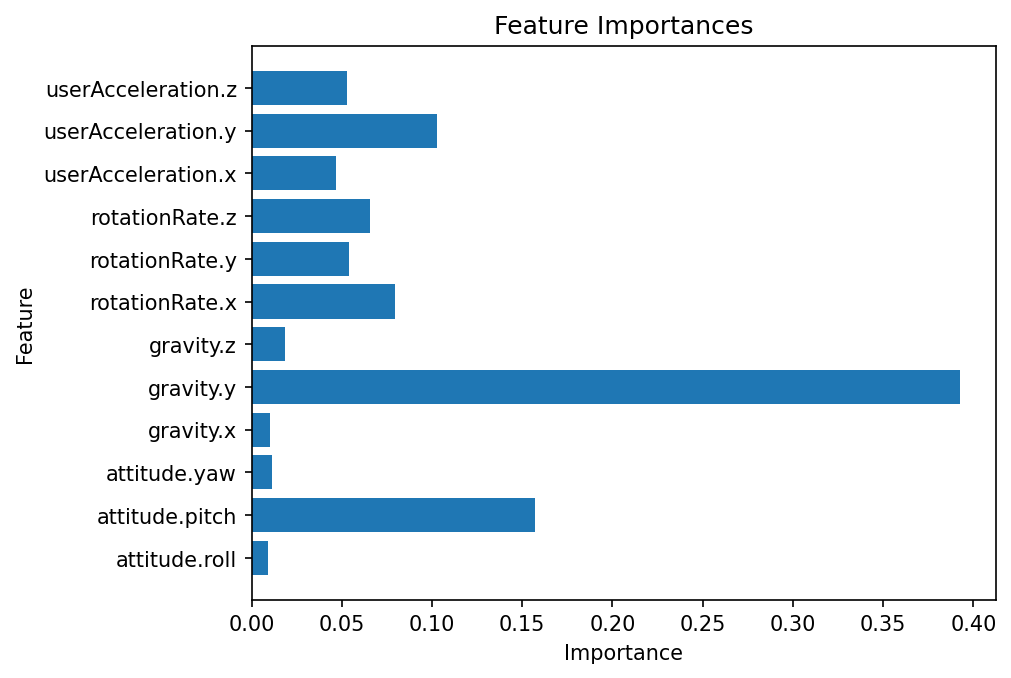

In [71]:
# Get feature importances
importances = best_model_gbm.feature_importances_

# Get feature names from the iris dataset
feature_names = X_test_gbm.columns

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(feature_names, importances)

# Set chart title and axis labels
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the chart
plt.show()


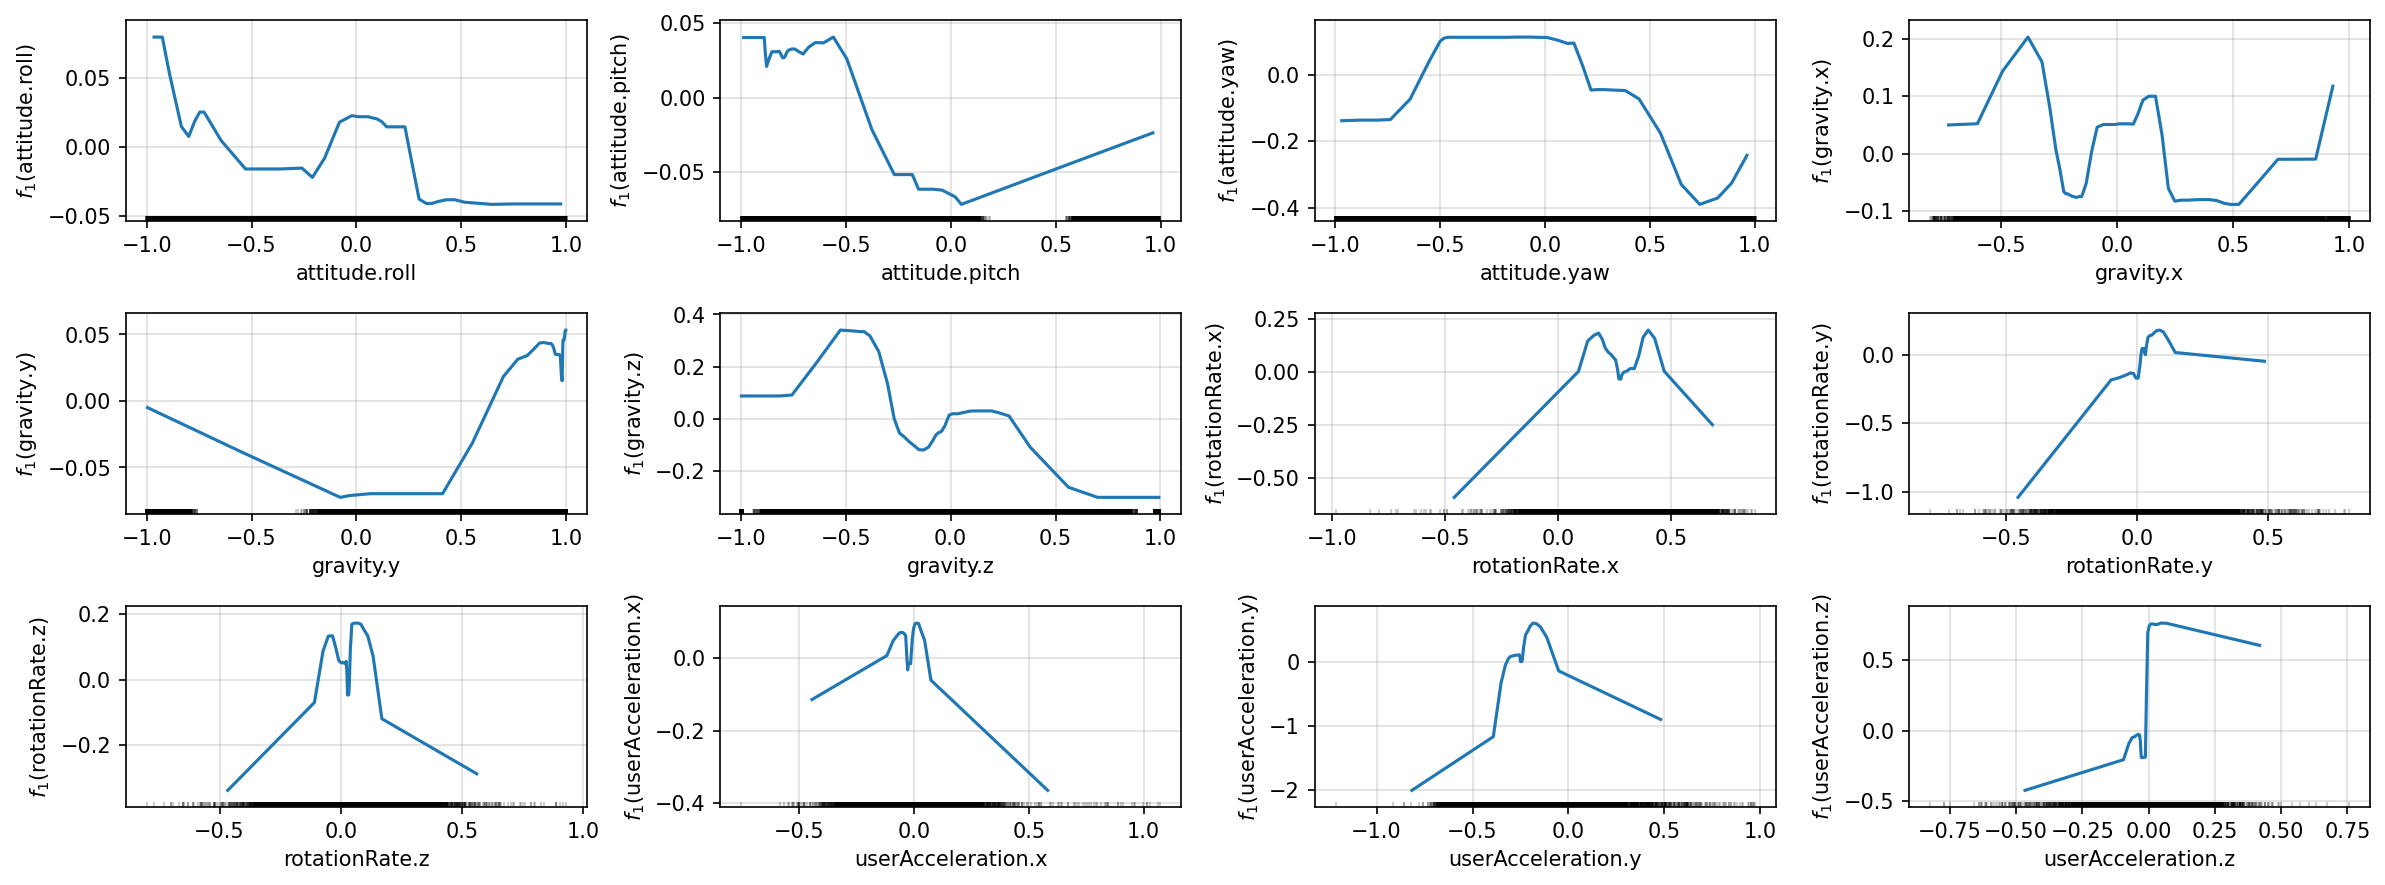

In [65]:
# first order effects of all 8 predictors, plotting in a 2 x 4 grid
num_rows=3
num_cols=4

fig,axs = plt.subplots(num_rows,num_cols,figsize=(16,6))
for i in range(num_rows):
    for j in range(num_cols):
        # select correct feature
        feature = X_test_gbm.columns[num_cols*i + j]
        _ = first_order_aleplot_quant(best_model_gbm.predict,X_test_gbm,feature,bins=50,ax=axs[i,j])

fig.tight_layout()